# Import Necessary Packages and Models for ML

In [89]:
import numpy as np # Linear Algebra

import pandas as pd # Dataset related Filtering

import seaborn as sns # Beautiful Graphs
sns.set_style('dark') # Set graph styles to 'dark'

import matplotlib.pyplot as plt # Normal ploating graphs
# show graphs in this notebook only 
%matplotlib inline

import plotly.express as px # For interactive plots


# ignore  the warning
import warnings  
warnings.filterwarnings('ignore') 



# 1. Data Collection

* First of all We need to data to train our model to predict better result.

So, We need the data for train our model

> ###  Dataset Informations:

1. survival - Survival (0 = No; 1 = Yes)
- class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [90]:
# Read Train.csv File 
trainDF = pd.read_csv('./../input/titanic/train.csv')

# show first five rows from training dataset
trainDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [91]:
# Read Test.csv File 
testDF = pd.read_csv('./../input/titanic/test.csv')

#  show 5 rows
testDF.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [92]:
# Print 5 Rows
testDF.head() # train() for last 5 rows

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [93]:
def show_shape(train, test):
    """ 
    display the shape of train and test DF 
    
    """   
    print(" Shape of Training DF", train.shape)
    print("")
    print(" Shape of Testing DF", test.shape)

In [94]:
#  to know shape of the training and testing data
show_shape(trainDF, testDF)

 Shape of Training DF (891, 12)

 Shape of Testing DF (418, 11)


In [95]:
# Create an function to display the information of our train and test dataset. Function can be called multiple time in this notebook.
def show_info(train, test):
    """ 
    display the Information of train and test DF 
    
    """
    
    print("Information of Training DF"+ "-"*10)
    print(train.info())
    print("")
    print("")
    print("")
    print("Information of Testing DF"+ "-"*10)
    print(test.info())

In [96]:
show_info(trainDF, testDF)

Information of Training DF----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None



Information of Testing DF----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------     

# 2. Feature Engineering

* Remove Object type of feature from train and test datasets.

Here we have some columns to remove from dataset 


In [97]:
removedFeatures = ['Name', 'Ticket', 'Cabin']

trainDF = trainDF.drop(removedFeatures, axis=1) # remove from train DF
testDF = testDF.drop(removedFeatures, axis=1) # remove from test DF

trainDF.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [98]:
# Age Feature

trainDF['Age'] = trainDF['Age'].fillna(trainDF['Age'].mean()) # fill for train DF
testDF['Age'] = testDF['Age'].fillna(testDF['Age'].mean()) # fill for test DF

In [99]:
trainDF['Embarked'].value_counts() # Group Wise count records

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [100]:
# Fill to Embarked column NA with S
 
trainDF['Embarked'] = trainDF['Embarked'].fillna('S') # for train DF only


In [101]:
# show info of train and test data set by calling function

show_info(trainDF, testDF)

Information of Training DF----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB
None



Information of Testing DF----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          

# 3. Visualization



In [102]:
# Show servived graph
 

# Plot Counts for Each survived groupby counts
fig = px.bar(trainDF.Survived.value_counts())

fig.show()

In [103]:
 

# Plot Counts for Each survived groupby counts
fig = px.bar(trainDF.groupby(['Survived']).count())

fig.show()

In [104]:
fig = px.histogram(trainDF, x='Survived', y='Pclass', color='Pclass');
fig.show()

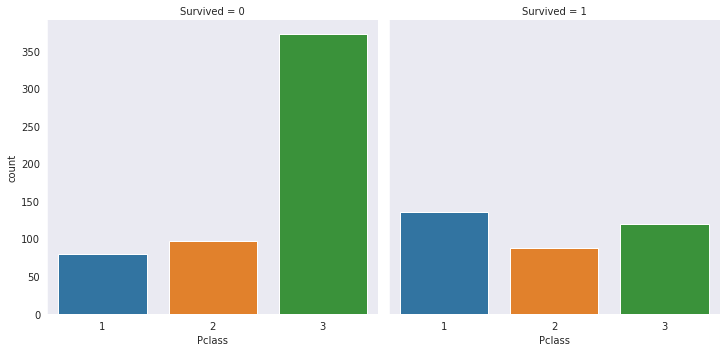

In [105]:
 
sns.catplot(x="Pclass", col="Survived", data=trainDF, kind="count");

plt.show()

In [106]:
fig = px.histogram(trainDF, x='Pclass', y= 'Survived', color='Pclass', )
fig.show()

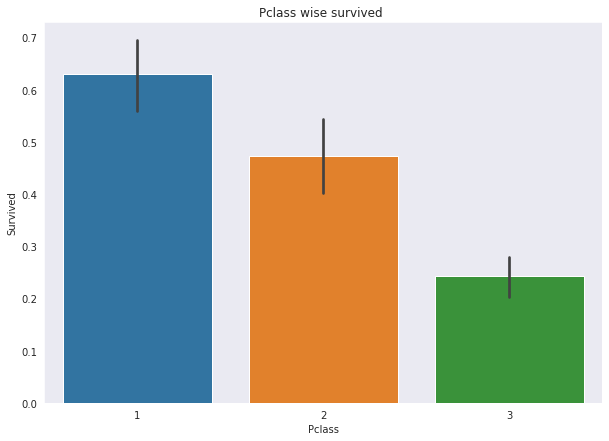

In [107]:
#  Pclass wise survived graph 


plt.figure(figsize=(10, 7))

sns.barplot(x= 'Pclass', y='Survived', data=trainDF)
plt.title("Pclass wise survived ")
plt.show()

In [108]:
# Gender wise Survived graph

fig = px.bar(trainDF, x='Sex', y='Survived', color='Sex')
fig.show()
 

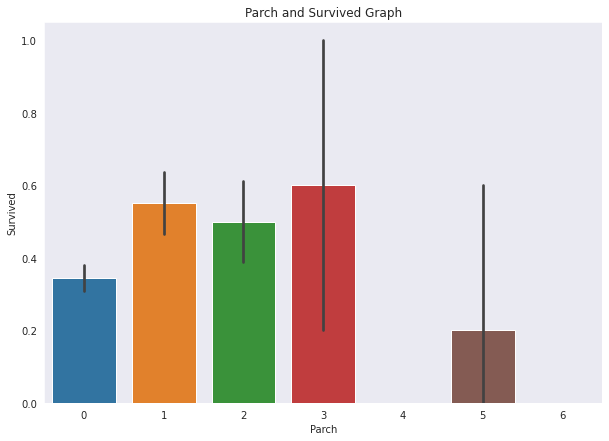

In [109]:
# Parch and Survived Bar graph
 
plt.figure(figsize=(10, 7))

sns.barplot(x = 'Parch', y= 'Survived', data= trainDF)
plt.title("Parch and Survived Graph")

plt.show()

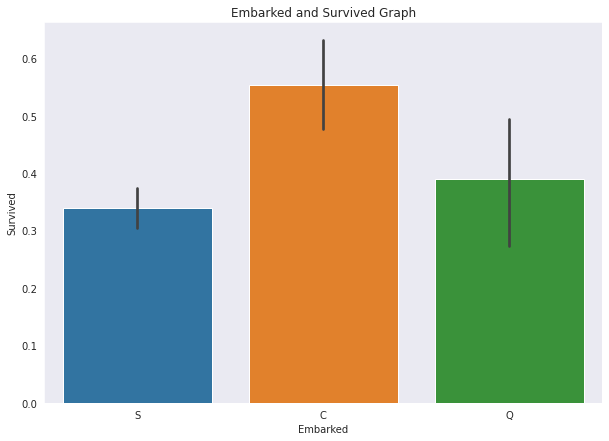

In [110]:
# Embarked and Survived bar Graph
plt.figure(figsize=(10, 7))

sns.barplot(x= 'Embarked', y = 'Survived', data= trainDF)
plt.title("Embarked and Survived Graph")

plt.show()

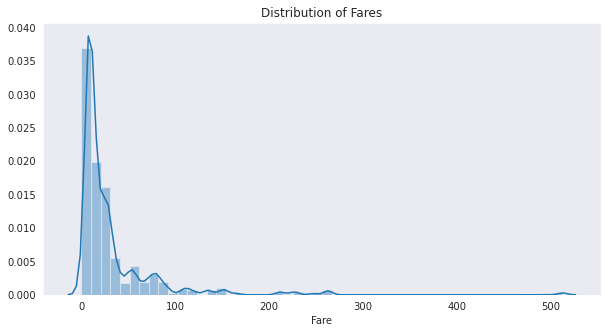

In [111]:
plt.figure(figsize=(10, 5))
sns.distplot(trainDF.Fare)
plt.title('Distribution of Fares')
plt.show()

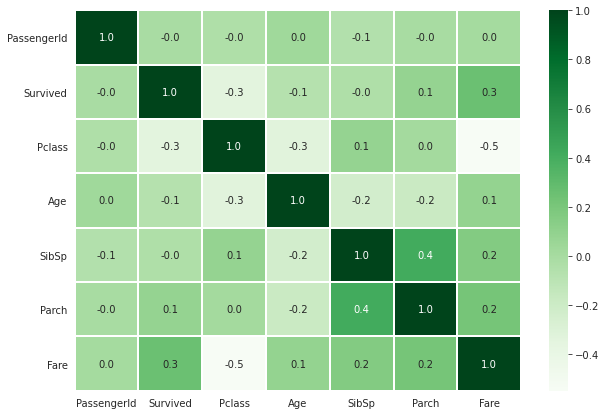

In [112]:
# heatmap show
plt.figure(figsize=(10, 7))
sns.heatmap(trainDF.corr(), cmap='Greens', linewidths=1, annot=True, fmt='.1f')

fig=plt.gcf()
plt.show()

In [113]:
# show the info
show_info(trainDF, testDF)

Information of Training DF----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB
None



Information of Testing DF----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          

In [114]:
# Fill na with median for Fare feature

testDF["Fare"] = testDF["Fare"].fillna(testDF["Fare"].mean()) # for test DF only

In [115]:
# Convert sex object values to numeric male=1 and female=0, for both train and test DF

trainDF['Sex'] = trainDF['Sex'].replace({'male': 0, 'female': 1})
testDF['Sex'] = testDF['Sex'].replace({'male': 0, 'female': 1})
 

In [116]:
# count values for Embarked
print(testDF['Embarked'].value_counts())
print(trainDF['Embarked'].value_counts())


S    270
C    102
Q     46
Name: Embarked, dtype: int64
S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [117]:
#  Now, Replace with alphabets to Numbers, for both train and test DF

trainDF['Embarked'] = trainDF['Embarked'].replace({'C': 1, 'S':2, 'Q': 3})
testDF['Embarked'] = testDF['Embarked'].replace({'C': 1, 'S': 2, 'Q': 3})

In [118]:
print(trainDF.head())
print(testDF.head())

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    0  22.0      1      0   7.2500         2
1            2         1       1    1  38.0      1      0  71.2833         1
2            3         1       3    1  26.0      0      0   7.9250         2
3            4         1       1    1  35.0      1      0  53.1000         2
4            5         0       3    0  35.0      0      0   8.0500         2
   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0          892       3    0  34.5      0      0   7.8292         3
1          893       3    1  47.0      1      0   7.0000         2
2          894       2    0  62.0      0      0   9.6875         3
3          895       3    0  27.0      0      0   8.6625         2
4          896       3    1  22.0      1      1  12.2875         2


**# 4. Model Prediction


In [119]:
# Load Accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [120]:
# Set Prediction value

X_train = trainDF.drop(['PassengerId', 'Survived'], axis=1)
y_train = trainDF['Survived']
X_test = testDF.drop(['PassengerId'], axis=1)



In [121]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)


(891, 7)
(891,)
(418, 7)


In [122]:
# Load Model
from sklearn.tree import DecisionTreeClassifier


In [123]:

model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [124]:
# To predict our model

pred = model.predict(X_test)
pred.shape

(418,)

In [125]:
# show prediction

accu = model.score(X_train, y_train) # model accuracy
print( "Model Prediction Score", (accu * 100).round(2))


Model Prediction Score 98.2


# 5. Model Submission

In [126]:
dict = {
    'PassengerId' : testDF['PassengerId'],
    'Survived' : pred
}

new_submission = pd.DataFrame(dict, )
new_submission.shape

(418, 2)

In [127]:
# Generate Submission File
# new_submission.to_csv('./my_new_submission.csv', index=False)
# print("Submission Successfully Saved...")

- 
Other Machine learning scores calculating.

In [128]:
# Import other Models Classes

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC, LinearSVC

from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import SGDClassifier

from sklearn.neighbors import KNeighborsClassifier

In [129]:
def model_wise_predict(models):
    """ 
    Model Predictions
    
    """
    ans_score = []
    for mdl, filename in models:
        m = mdl
        m.fit(X_train, y_train)
        pred = m.predict(X_test)
        m_accuracy = m.score(X_train, y_train)
        ans_score.append((m_accuracy*100).round(2))
        
        dict = {
            'PassengerId' : testDF['PassengerId'],
            'Survived' : pred
        }
        new_submission = pd.DataFrame(dict, )
        
        
        new_submission.to_csv(filename, index=False)
        
        
    return ans_score

In [130]:
#  Using DecisionTreeClassifier Model

#  make list of Models
models = [
    (RandomForestClassifier(n_estimators=300, max_depth=20, random_state=5), 'DTC_submission.csv'),
    (RandomForestClassifier(), 'RFC_submission.csv'),
    (LogisticRegression(), 'LR_submission.csv'),
    (LinearSVC(), 'SVC_submission.csv'),
    (GaussianNB(), 'GNB_submission.csv'),
    (SGDClassifier(), 'SGD_submission.csv'),
    (KNeighborsClassifier(), 'KNC_submission.csv')
]

data = model_wise_predict(models)
print("scores are", data)

scores are [98.2, 98.2, 79.91, 78.11, 79.01, 62.4, 80.81]


In [131]:

list_model_name = [
    'DecisionTreeClassifier',
    'RandomForestClassifier',
    'LogisticRegression', 
    'LinearSVC',
    'GaussianNB',
    'SGDClassifier', 
    'KNeighborsClassifier'
]


In [132]:
print(X_train, y_train)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         2
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         2
3         1    1  35.000000      1      0  53.1000         2
4         3    0  35.000000      0      0   8.0500         2
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         2
887       1    1  19.000000      0      0  30.0000         2
888       3    1  29.699118      1      2  23.4500         2
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         3

[891 rows x 7 columns] 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [140]:
# Customize Model
# TEST

# HYPER TUNNING -------------------------------------------------------------- Start

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

rfc_model = RandomForestClassifier(random_state=45)

rfc_params_grid = {
    'n_estimators' : np.arange(500, 1000, 100),
#     'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],
    'max_depth' : np.arange(6, 8),
    'max_features': ['auto'],
    'criterion': ["gini", "entropy"]
}

# params = {
#     'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],
#     'n_estimators':[100,250,500,750,1000,1250,1500,1750],
#     'max_depth': np.random.randint(1, (len(train.columns)*.85),20),
#     'max_features': np.random.randint(1, len(train.columns),20),
#     'min_samples_split':[2,4,6,8,10,20,40,60,100], 
#     'min_samples_leaf':[1,3,5,7,9],
#     'criterion': ["gini", "entropy"]
# }

gscv_random_classifier = GridSearchCV(estimator=rfc_model, param_grid=rfc_params_grid, cv=5)

gscv_random_classifier.fit(X_train, y_train)

pred = gscv_random_classifier.predict(X_test)

print("--------------- START ---------------")

# print(accuracy_score(y_test, pred))
print(gscv_random_classifier.best_estimator_)
print(gscv_random_classifier.best_score_)
print(gscv_random_classifier.best_params_)

print("--------------- OVER ---------------")

# HYPER TUNNING -------------------------------------------------------------- END

--------------- START ---------------
RandomForestClassifier(max_depth=5, n_estimators=500, random_state=45)
0.820475801895675
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 500}
--------------- OVER ---------------


In [146]:
#  DOWNLOAD SUBMISSION

# Submission FILE EXPORTING  -------------------------------------------------------------- Start
m = RandomForestClassifier(max_depth=5, n_estimators=500, random_state=45, n_jobs=-1)
m.fit(X_train, y_train)
pred = m.predict(X_test)


dict = {
    'PassengerId' : testDF['PassengerId'],
    'Survived' : pred
}

new_submission = pd.DataFrame(dict, )
new_submission.to_csv('Random-Forest-Class-Grid-Search-CV.csv', index=False)

# Submission FILE EXPORTING  -------------------------------------------------------------- END


97.98

# Prediction Dashboard

In [ ]:

modelDF = pd.DataFrame({"Model_Name" : list_model_name, "Pred_Score": data})
modelDF.sort_values(by='Pred_Score', ascending=False)
modelDF